In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [2]:
dataset = pd.read_csv('UP_2019.csv')

In [3]:
dataset.head()

,District,Total votes,EVM votes,Postal votes,Winner,votes of winner,Winner votes %,winning party
0,Uttar Pradesh-Saharanpur,1231746,1228915,2831,HAJI FAZLUR REHMAN,514139,41.74,Bahujan Samaj Party
1,Uttar Pradesh-Kairana,1124047,1120863,3184,Pradeep Kumar,566961,50.44,Bharatiya Janata Party
2,Uttar Pradesh-Muzaffarnagar,1160071,1154192,5879,Sanjeev Kumar Balyan,573780,49.46,Bharatiya Janata Party
3,Uttar Pradesh-Bijnor,1100763,1096313,4450,Sanjeev Kumar Balyan,573780,49.46,Bharatiya Janata Party
4,Uttar Pradesh-Nagina,1009456,1005955,3501,Sanjeev Kumar Balyan,573780,49.46,Bharatiya Janata Party


In [4]:
dataset['District'] = dataset['District'].apply(lambda names : names[14:])

In [5]:
dataset.head()

,District,Total votes,EVM votes,Postal votes,Winner,votes of winner,Winner votes %,winning party
0,Saharanpur,1231746,1228915,2831,HAJI FAZLUR REHMAN,514139,41.74,Bahujan Samaj Party
1,Kairana,1124047,1120863,3184,Pradeep Kumar,566961,50.44,Bharatiya Janata Party
2,Muzaffarnagar,1160071,1154192,5879,Sanjeev Kumar Balyan,573780,49.46,Bharatiya Janata Party
3,Bijnor,1100763,1096313,4450,Sanjeev Kumar Balyan,573780,49.46,Bharatiya Janata Party
4,Nagina,1009456,1005955,3501,Sanjeev Kumar Balyan,573780,49.46,Bharatiya Janata Party


In [6]:
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,4] = le.fit_transform(X[:,4])

In [8]:
from sklearn.preprocessing import OneHotEncoder
Ohe = OneHotEncoder(categorical_features=[0, 4])
X = Ohe.fit_transform(X)
X = X.toarray()

y = le.fit_transform(y)

C:\Users\SHUBHAM\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\SHUBHAM\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\SHUBHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SHUBHAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
log_reg.score(X_train,y_train)

0.90625

In [12]:
log_reg.score(X_test,y_test)

0.875

In [13]:
log_reg.score(X,y)

0.9

In [14]:
y_pred = log_reg.predict(X) 

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)

In [16]:
cm

array([[ 1,  0,  0],
       [ 0, 71,  2],
       [ 0,  6,  0]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y,y_pred,average='micro')

0.9

In [18]:
recall_score(y,y_pred,average='micro')

0.9

In [19]:
recall_score(y,y_pred,average='micro')

0.9

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
dtc.score(X_train,y_train)

1.0

In [22]:
dtc.score(X_test,y_test)

0.875

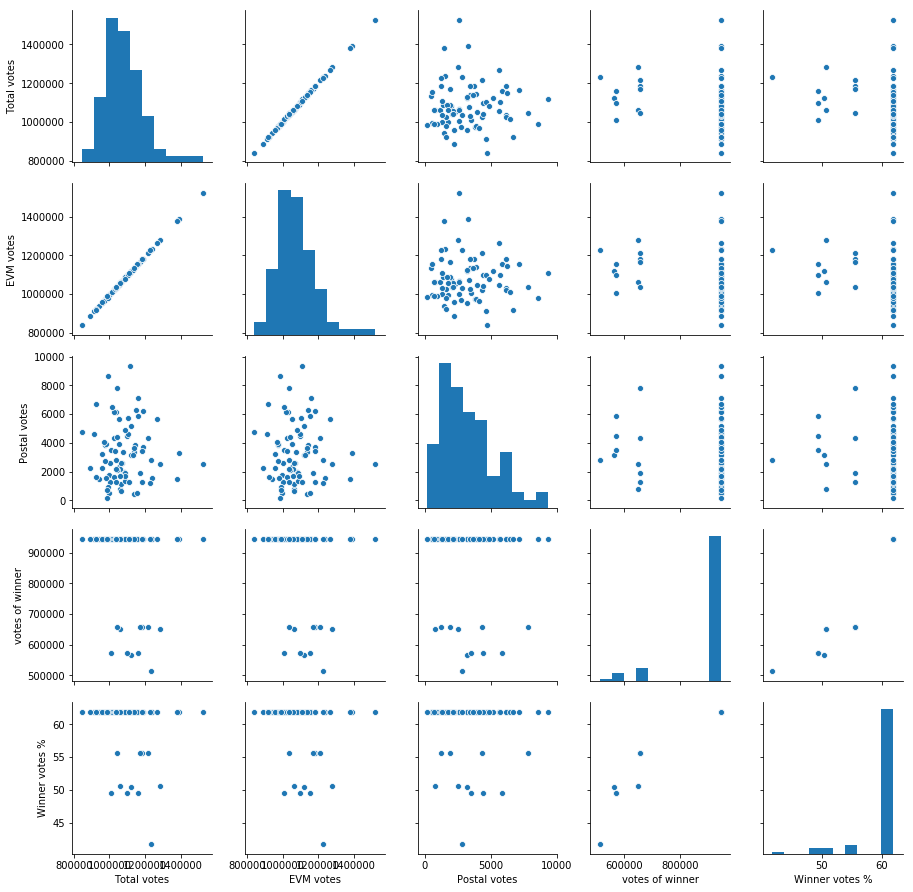

In [23]:
sns.pairplot(dataset)

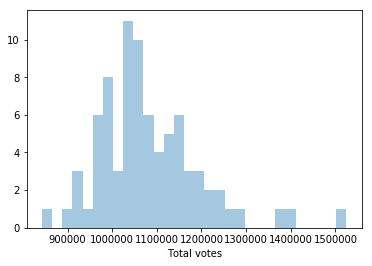

In [24]:
sns.distplot(dataset['Total votes'],kde=False,bins=30)

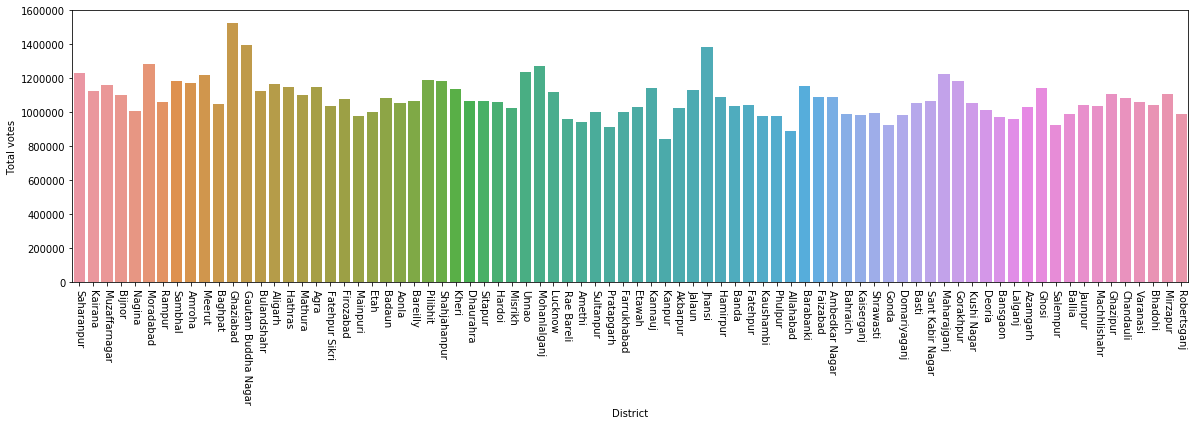

In [27]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=-90)
sns.barplot(x='District',y='Total votes',data=dataset)

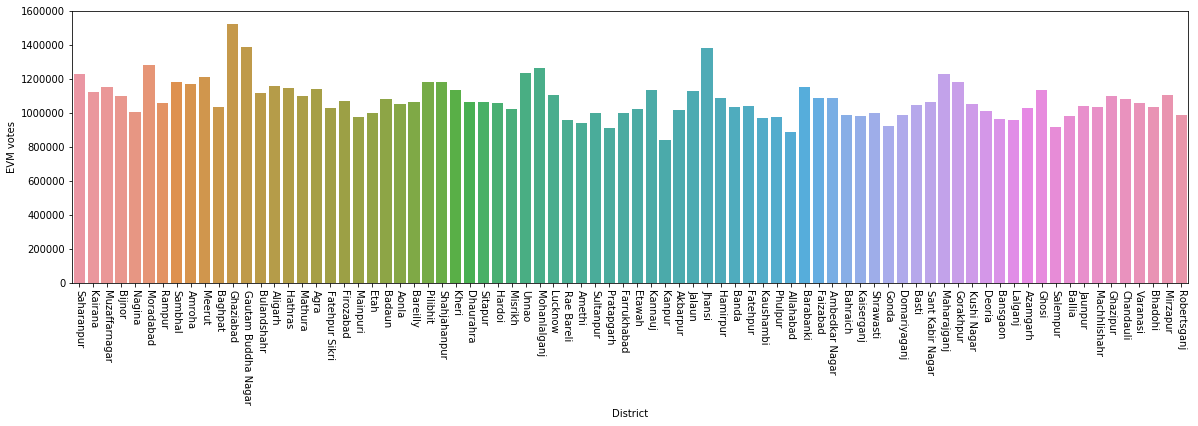

In [28]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=-90)
sns.barplot(x='District',y='EVM votes',data=dataset)

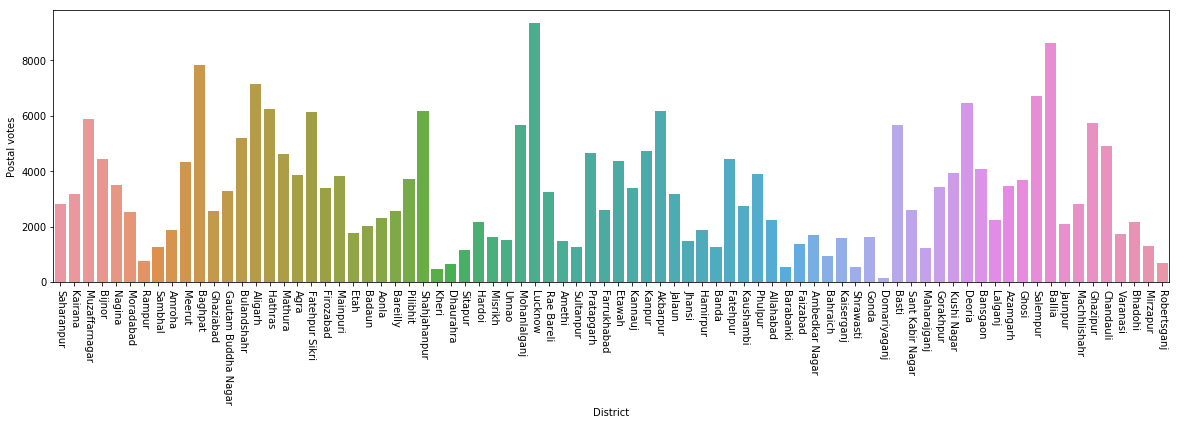

In [30]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=-90)
sns.barplot(x='District',y='Postal votes',data=dataset)

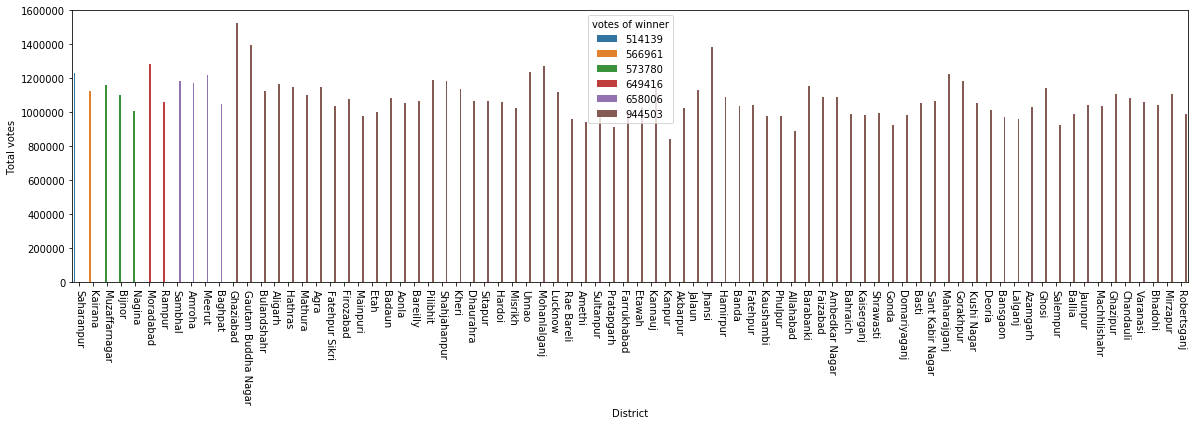

In [44]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=-90)
sns.barplot(x='District',y='Total votes',data=dataset,hue='votes of winner')

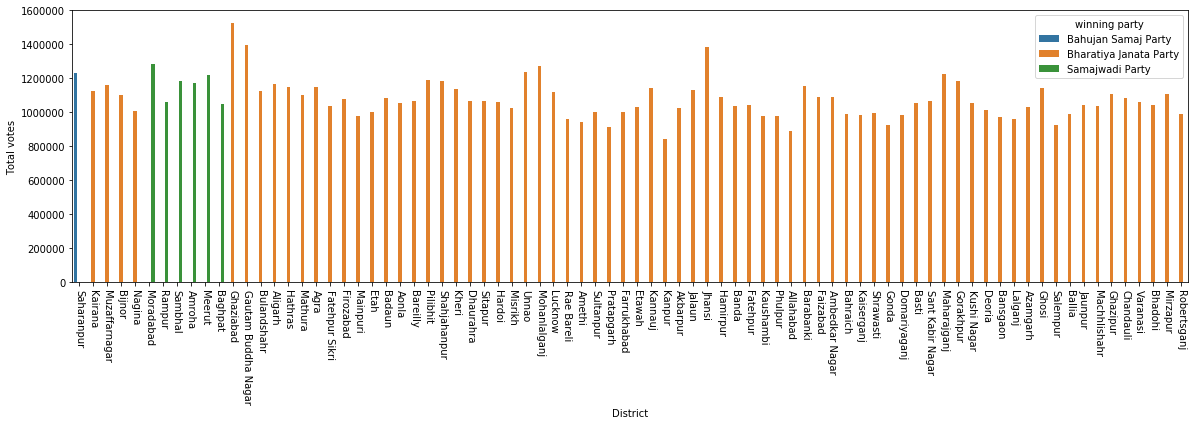

In [45]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=-90)
sns.barplot(x='District',y='Total votes',data=dataset,hue='winning party')

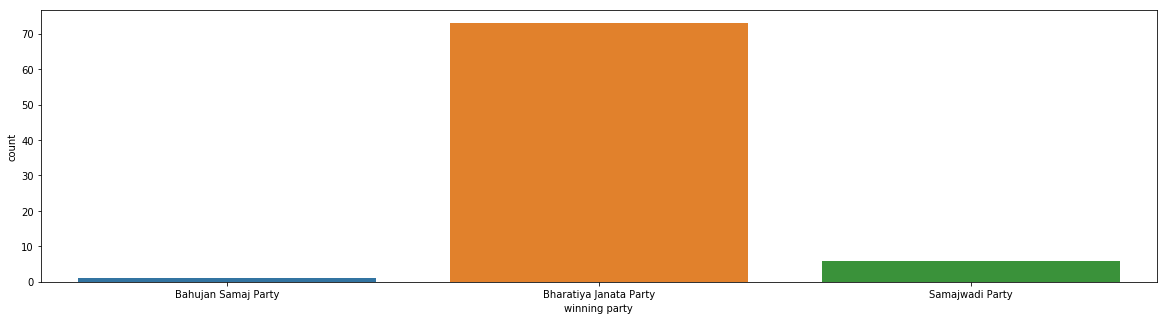

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(x='winning party',data=dataset)

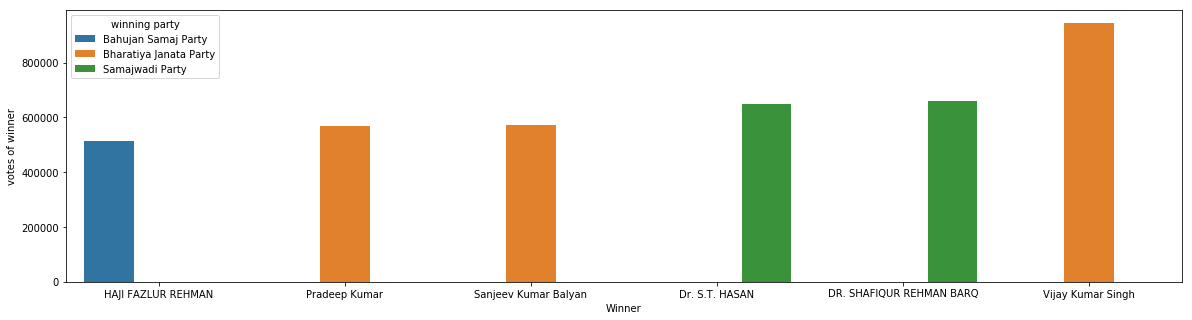

In [39]:
plt.figure(figsize=(20,5))
sns.barplot(x='Winner',y='votes of winner',data=dataset,hue='winning party')

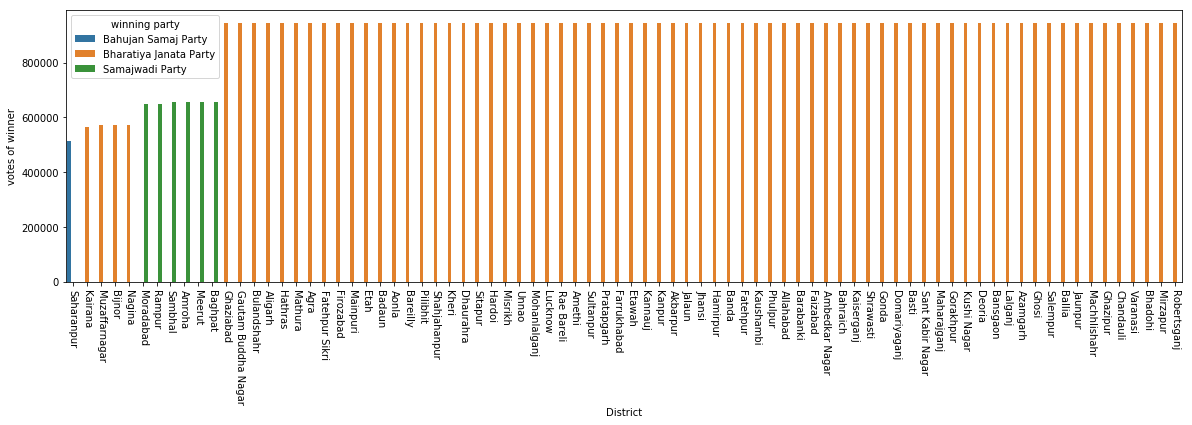

In [43]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=-90)
sns.barplot(x='District',y='votes of winner',data=dataset,hue='winning party')